<a href="https://colab.research.google.com/github/MNLepage08/Project-Report/blob/main/LangChain_with_HuggingFace_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/dD_xNmePdd0

In [1]:
!pip -q install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.0 MB/s eta 0:00:00


In [2]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
# !pip install python-dotenv
# Use that for VSCode
# https://pypi.org/project/python-dotenv/

In [3]:
from langchain import HuggingFaceHub, LLMChain
from langchain.prompts import PromptTemplate

#from dotenv import load_dotenv

In [ ]:
#load_dotenv()

True

In [7]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'hf_xxx' # put your API token

https://www.promptingguide.ai/fr

## Translate English to SQL

In [8]:
# https://huggingface.co/mrm8488/t5-base-finetuned-wikiSQL

hub_llm = HuggingFaceHub(repo_id='mrm8488/t5-base-finetuned-wikiSQL')

prompt = PromptTemplate(
    input_variables = ["question"],
    template = "Translate English to SQL: {question}"
)

hub_chain = LLMChain(prompt = prompt, llm=hub_llm, verbose=False)
print(hub_chain.run("what is the average age of the respondents using a mobile device?"))


SELECT AVG Age (years) FROM table WHERE Device = mobile


## GPT2 for text generation

In [ ]:
# https://huggingface.co/gpt2

hub_llm = HuggingFaceHub(
    repo_id='gpt2',
    model_kwargs={'temperature':0.8, 'max_length':50}
    )

prompt = PromptTemplate(
    input_variables = ["profession"],
    template = "You had one job! 🙂 You're the {profession} and you didn't have to be sarcastic"
)

hub_chain = LLMChain(prompt = prompt, llm=hub_llm, verbose=False)
print(hub_chain.run("customer service agent"))

. You were just a good guy.

I'm not sure if you've ever been to a restaurant where you were treated like a customer.


https://youtu.be/Kn7SX2Mx_Jk

## Q&A: FLAN-T5

We can then generate text using a HF Hub model (we'll use google/flan-t5-x1) using the Inference API built into Hugging Face Hub.

(The default Inference API doesn't use specialized hardware and so can be slow and cannot run larger models like bigscience/bloom-560m or google/flan-t5-xxl)

In [ ]:
template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
llm_chain = LLMChain(prompt=prompt,
                     llm=HuggingFaceHub(repo_id="google/flan-t5-xxl",
                                        model_kwargs={"temperature":0.1,
                                                      "max_length":252}))

In [ ]:
question = "What is the capital of France?"

print(llm_chain.run(question))

Paris is the capital of France. Paris is the capital of France. The answer: Paris.


In [ ]:
question = "What area is best for growing wine in France?"

print(llm_chain.run(question))

France is divided into regions. The best growing conditions for wine are found in the regions of Bordeaux,


## Information Retreival - LangChain

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=49effaca8d675995b7dda3d0663a1162d5eddf997f88a541c8e946b1d23b8cf7
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


Download text file

In [ ]:
import requests

url = "https://raw.githubusercontent.com/hwchase17/langchain/master/docs/modules/state_of_the_union.txt"
res = requests.get(url)
with open("state_of_the_union.txt", "w") as f:
  f.write(res.text)

In [ ]:
# Document Loader
from langchain.document_loaders import TextLoader
loader = TextLoader('./state_of_the_union.txt')
documents = loader.load()

In [ ]:
documents

[Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. \n\nGroups of citize

In [ ]:
import textwrap

def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [ ]:
print(wrap_text_preserve_newlines(str(documents[0])))

page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress
and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart.
This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But
most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution.
\n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s
Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his
menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll
over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President
Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world.
\n\nGroups of citizens blockin

In [ ]:
# Text Splitter
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [ ]:
len(docs)

42

In [ ]:
docs[0]

Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world.', metadata={'source':

**Embegging**

In [ ]:
# Embeddings
from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings()

In [ ]:
!pip install faiss-cpu
# A library for efficient similarity search and clustering of dense vectors.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 65.4 MB/s eta 0:00:00


In [ ]:
# Vectorstore: https://python.langchain.com/en/latest/modules/indexes/vectorstores.html
from langchain.vectorstores import FAISS

db = FAISS.from_documents(docs, embeddings)

In [ ]:
query = "What did the president say about the Supreme Court"
docs = db.similarity_search(query)

In [ ]:
print(wrap_text_preserve_newlines(str(docs[0].page_content)))

Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And
while you’re at it, pass the Disclose Act so Americans can know who is funding our elections.

Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an
Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer,
thank you for your service.

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the
United States Supreme Court.

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our
nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


**Create QA Chain**

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain import HuggingFaceHub

In [ ]:
llm=HuggingFaceHub(repo_id="google/flan-t5-xxl", model_kwargs={"temperature":0.1, "max_length":512})

In [ ]:
chain = load_qa_chain(llm, chain_type="stuff")

In [ ]:
query = "What did the president say about the Supreme Court"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

'One of the most serious constitutional responsibilities a President has is nominating someone to serve on'

In [ ]:
query = "What did the president say about economy?"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

'Our economy grew at a rate of 5.7% last year, the strongest growth in nearly 40'

## Replicate

https://python.langchain.com/en/latest/modules/models/llms/integrations/replicate.html

In [9]:
!pip install replicate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# get a token: https://replicate.com/account

from getpass import getpass

REPLICATE_API_TOKEN = getpass()

··········


In [11]:
import os
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [12]:
from langchain.llms import Replicate
from langchain import PromptTemplate, LLMChain

In [13]:
Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf", input={'image_dimensions': '512x512'})

Replicate(cache=None, verbose=False, callbacks=None, callback_manager=None, model='stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf', input={'image_dimensions': '512x512'}, model_kwargs={}, replicate_api_token='r8_GisE2Fv5ABb2coq9UzWkqHQWxfhkRUE2XAQcQ')

In [14]:
llm = Replicate(model="replicate/dolly-v2-12b:ef0e1aefc61f8e096ebe4db6b2bacc297daf2ef6899f0f7e001ec445893500e5")

In [15]:
prompt = """
Answer the following yes/no question by reasoning step by step.
Can a dog drive a car?
"""
llm(prompt)

'No, dogs are not capable of driving cars because they do not have hands sufficient to operate a steering wheel or pedals required to control a vehicle. Dogs use their mouths and noses to sense the world around them, just as humans do; in fact, most dogs can identify and orient towards their own excretions (e.g., urine, feces). However, this does not make them drivers, nor would it be desirable for them to become drivers given how they naturally perceive the world.\n\n'

In [16]:
text2image = Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf",
                       input={'image_dimensions': '512x512'})

In [45]:
image_output = text2image("A cat riding a motorcycle by Picasso")
image_output

'https://replicate.delivery/pbxt/NcmltGSi7e3FTKgmY7dfhTklNCMfBqZGDvVMP3fDekZb8EzIC/out-0.png'

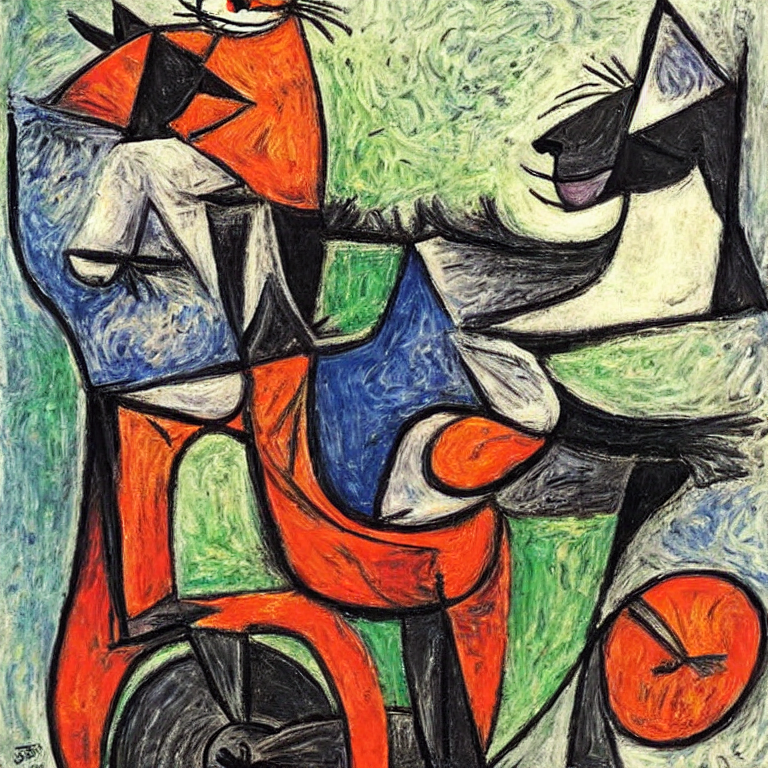

In [46]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(image_output)
img = Image.open(BytesIO(response.content))

img

**Chaining Calls**

In [19]:
from langchain.chains import SimpleSequentialChain

In [20]:
dolly_llm = Replicate(model="replicate/dolly-v2-12b:ef0e1aefc61f8e096ebe4db6b2bacc297daf2ef6899f0f7e001ec445893500e5")
text2image = Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf")

In [21]:
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(llm=dolly_llm, prompt=prompt)

In [22]:
second_prompt = PromptTemplate(
    input_variables=["company_name"],
    template="Write a description of a logo for this company: {company_name}",
)
chain_two = LLMChain(llm=dolly_llm, prompt=second_prompt)

In [23]:
third_prompt = PromptTemplate(
    input_variables=["company_logo_description"],
    template="{company_logo_description}",
)
chain_three = LLMChain(llm=text2image, prompt=third_prompt)

In [24]:
# Run the chain specifying only the input variable for the first chain.
overall_chain = SimpleSequentialChain(chains=[chain, chain_two, chain_three], verbose=True)
catchphrase = overall_chain.run("colorful socks")
print(catchphrase)



> Entering new  chain...
Colorful Socks could be named after its colorway or a fun phrase related to socks such as "Come On, Feet!" or "Sock it to Me!"


Colorful Socks could benamed after one of its manycolorways such as Blue Sock Day, Red SockRepublic, Green socksor even Tan & Gold combination. A funphrase related to socks might be"Come on, feet!", "Sock it to me!"or "Ninja Socks". Thelogo should include theslogan in some form inside thesock so customersknow which colorway to purchase andmight also receivea glimpse into theirfavorite topics; sportssoccer football music ninjawarrior video games.The colors chosenshould reflect thoseof an athletic shoe but notoverpower themand complementthe rest of the brand'sidentity while still being eye-catchingand memorable.


https://replicate.delivery/pbxt/fUKiVUlL7tREJSVgCr3s7orjXtYoxf3AGu6ltr1PoB8LPYGRA/out-0.png

> Finished chain.
https://replicate.delivery/pbxt/fUKiVUlL7tREJSVgCr3s7orjXtYoxf3AGu6ltr1PoB8LPYGRA/out-0.png


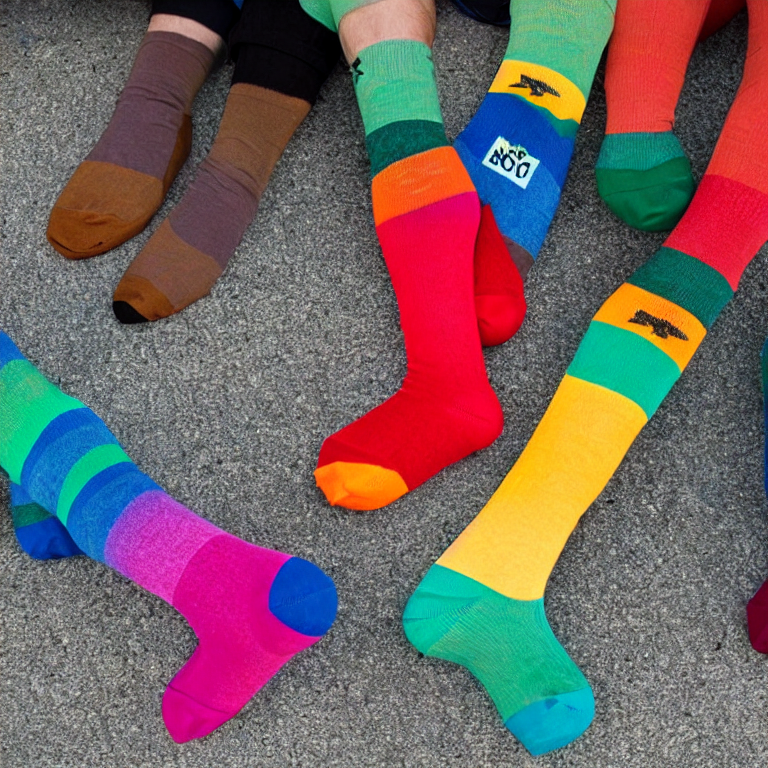

In [47]:
response = requests.get("https://replicate.delivery/pbxt/fUKiVUlL7tREJSVgCr3s7orjXtYoxf3AGu6ltr1PoB8LPYGRA/out-0.png")
img = Image.open(BytesIO(response.content))
img